In [3]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as mp
import os

import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [81]:
# Download data and set working directory
data = et.data.get_data("cold-springs-fire")
os.chdir(os.path.join(et.io.HOME, 
                      "earth-analytics", 
                      "data"))

In [82]:
# Get list of all pre-cropped data and sort the data

# Create the path to your data
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop")

# Generate a list of tif files
post_fire_paths = glob(os.path.join(landsat_post_fire_path,
                                        "*band*.tif"))

# Sort the data to ensure bands are in the correct order
post_fire_paths.sort()
post_fire_paths

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T

In [83]:
# Open a single band without squeeze - notice the first dimension is 1
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True)
band_1.shape

(1, 177, 246)

In [84]:
# Open a single band using squeeze notice there are only 2 dimensions here
# when you use squeeze
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True).squeeze()
band_1.shape

(177, 246)

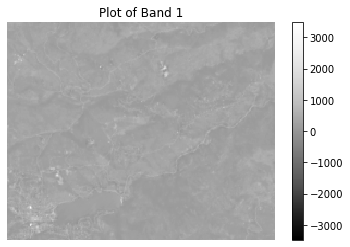

In [85]:
# Plot the data
f, ax=plt.subplots()
band_1.plot.imshow(ax=ax,
                  cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()

In [86]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [87]:
# Open all bands in a loop
all_bands = []
for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1

In [88]:
# OPTIONAL: Turn list of bands into a single xarray object    
landsat_post_fire_xr = xr.concat(all_bands, dim="band") 
landsat_post_fire_xr

<xarray.DataArray (band: 7, y: 177, x: 246)>
array([[[ 446.,  476.,  487., ...,  162.,  220.,  260.],
        [ 393.,  457.,  488., ...,  200.,  235.,  296.],
        [ 364.,  393.,  388., ...,  246.,  298.,  347.],
        ...,
        [ 249.,  283.,  363., ...,  272.,  268.,  284.],
        [ 541.,  474.,  364., ...,  260.,  269.,  285.],
        [ 219.,  177.,  250., ...,  271.,  271.,  286.]],

       [[ 515.,  547.,  572., ...,  181.,  233.,  261.],
        [ 440.,  519.,  571., ...,  211.,  251.,  322.],
        [ 411.,  460.,  449., ...,  264.,  326.,  387.],
        ...,
        [ 387.,  326.,  427., ...,  288.,  278.,  301.],
        [ 554.,  654.,  433., ...,  276.,  276.,  293.],
        [ 291.,  174.,  291., ...,  292.,  290.,  304.]],

       [[ 782.,  772.,  843., ...,  335.,  390.,  411.],
        [ 684.,  771.,  836., ...,  363.,  412.,  511.],
        [ 656.,  725.,  706., ...,  425.,  518.,  599.],
        ...,
...
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7
  * x            (x) float64 4.557e+05 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  3483
    STATISTICS_MEAN:     297.16466859584
    STATISTICS_MINIMUM:  -57
    STATISTICS_STDDEV:   119.61507774931
    scale_factor:        1.0
    add_offset:          0.0

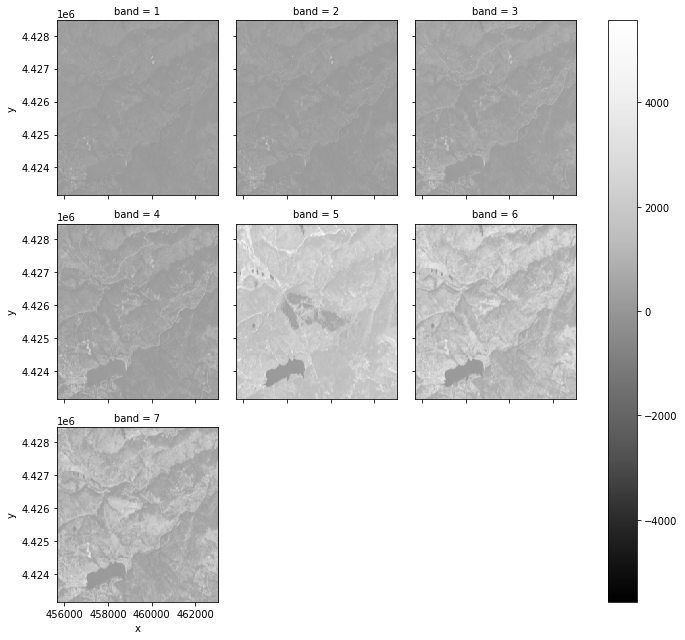

In [89]:
landsat_post_fire_xr.plot.imshow(col="band",
                                 col_wrap=3,
                                 cmap="Greys_r")
plt.show()

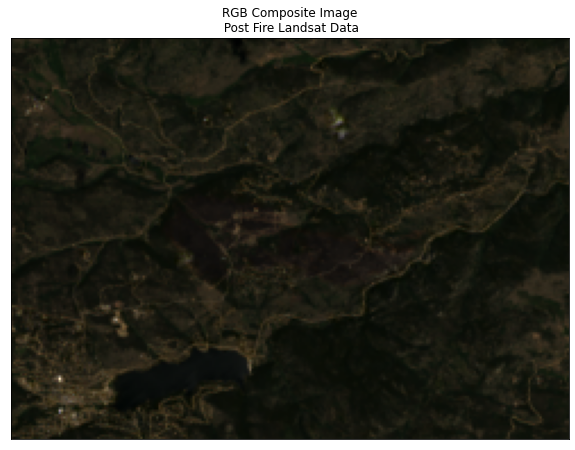

In [90]:
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Post Fire Landsat Data")
plt.show()


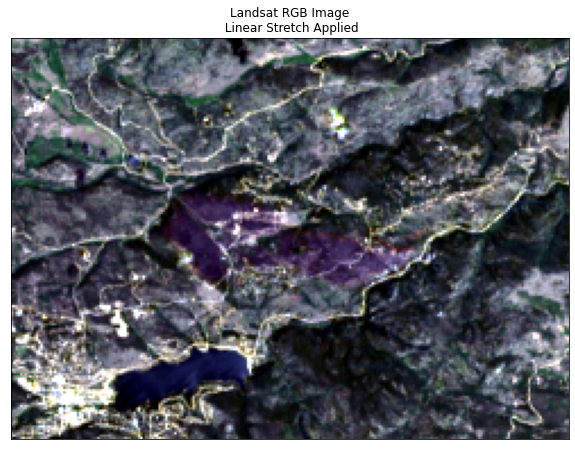

In [91]:
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=1)
plt.show()

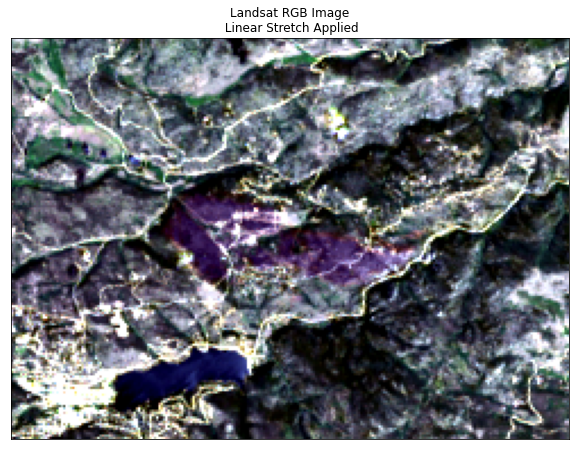

In [92]:
# Adjust the amount of linear stretch to futher brighten the image
ls = ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=4)
plt.show()

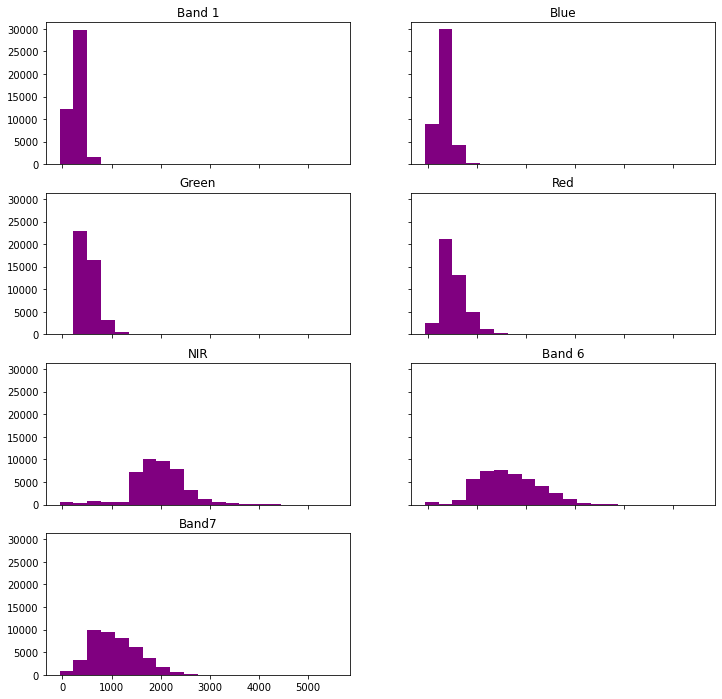

In [93]:
# Plot all band histograms using earthpy
band_titles = ["Band 1", 
               "Blue", 
               "Green", 
               "Red",
               "NIR", 
               "Band 6", 
               "Band7"]

ep.hist(landsat_post_fire_xr.values,
        title=band_titles)

plt.show()

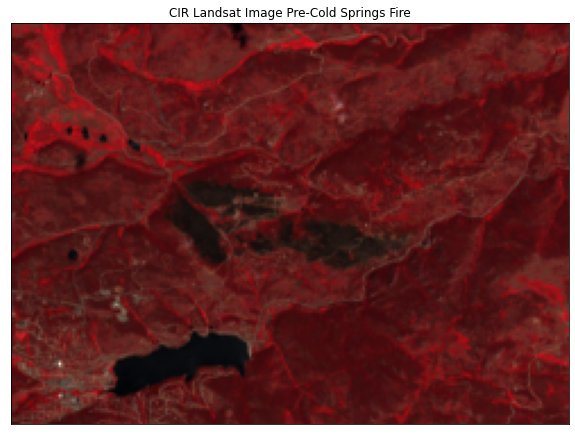

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [112]:

fig = ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[4, 3, 2],
            title="CIR Landsat Image Pre-Cold Springs Fire",
            figsize=(10, 10))
# raster_prof = es.stack(fig, out_path=r'C:\ai-la\landsat-processing\notebooks\chip-processing\3dPlot.png')
# plt.savefig(fname=r'C:\ai-la\landsat-processing\notebooks\chip-processing\3dPlot.png')
# fig = plt.gcf()
# plt.show()
# fig = plt.gcf()
fig.savefig(r'C:\ai-la\landsat-processing\notebooks\chip-processing\test.png', dpi=500)
plt.show()

In [59]:
# save figure
# (1) save the image in memory in PNG format
from PIL import Image
from io import BytesIO
png1 = BytesIO()
plt.savefig(png1, format='tiff')

# (2) load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
png2.save(r'C:\ai-la\landsat-processing\notebooks\chip-processing\3dPlot1.tiff')
png1.close()

<Figure size 432x288 with 0 Axes>

In [62]:
plt.show()

In [19]:
# OPTIONAL: Turn list of bands into a single xarray object    
landsat_post_fire_xr = xr.concat([4, 3, 2], dim="band") 
landsat_post_fire_xr

TypeError: can only concatenate xarray Dataset and DataArray objects, got <class 'int'>